In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()



Saving current_health_exp.csv to current_health_exp.csv
Saving unemployment.csv to unemployment.csv
Saving infl_consumer_prices.csv to infl_consumer_prices.csv
Saving purchase_power_parity.csv to purchase_power_parity.csv
Saving life_expectancy.csv to life_expectancy.csv
Saving gdp_per_capita.csv to gdp_per_capita.csv
Saving school_enrollment.csv to school_enrollment.csv


In [3]:
life = pd.read_csv("life_expectancy.csv", skiprows=4)
gdp = pd.read_csv("gdp_per_capita.csv", skiprows=4)
edu = pd.read_csv("school_enrollment.csv", skiprows=4)
ppp = pd.read_csv("purchase_power_parity.csv", skiprows=4)
infl = pd.read_csv("infl_consumer_prices.csv", skiprows=4)
unemp = pd.read_csv("unemployment.csv", skiprows=4)
health = pd.read_csv("current_health_exp.csv", skiprows=4)

In [4]:
cols = ['Country Name', 'Country Code'] + [str(y) for y in range(2000, 2023)]

datasets = [life, gdp, edu, ppp, infl, unemp, health]
for i in range(len(datasets)):
    datasets[i] = datasets[i][cols]

life, gdp, edu, ppp, infl, unemp, health = datasets


In [5]:
life_long = life.melt(id_vars=['Country Name','Country Code'], var_name='Year', value_name='Life_Expectancy')
gdp_long = gdp.melt(id_vars=['Country Name','Country Code'], var_name='Year', value_name='GDP_per_Capita')
edu_long = edu.melt(id_vars=['Country Name','Country Code'], var_name='Year', value_name='School_Enrollment')
ppp_long = ppp.melt(id_vars=['Country Name','Country Code'], var_name='Year', value_name='PPP')
infl_long = infl.melt(id_vars=['Country Name','Country Code'], var_name='Year', value_name='Inflation')
unemp_long = unemp.melt(id_vars=['Country Name','Country Code'], var_name='Year', value_name='Unemployment')
health_long = health.melt(id_vars=['Country Name','Country Code'], var_name='Year', value_name='Health_Expenditure')


In [6]:
df = life_long.merge(gdp_long, on=['Country Name','Country Code','Year'], how='inner')
df = df.merge(edu_long, on=['Country Name','Country Code','Year'], how='left')
df = df.merge(ppp_long, on=['Country Name','Country Code','Year'], how='left')
df = df.merge(infl_long, on=['Country Name','Country Code','Year'], how='left')
df = df.merge(unemp_long, on=['Country Name','Country Code','Year'], how='left')
df = df.merge(health_long, on=['Country Name','Country Code','Year'], how='left')

df['Year'] = df['Year'].astype(int)


In [7]:
df.isna().sum()


,0
Country Name,0
Country Code,0
Year,0
Life_Expectancy,23
GDP_per_Capita,184
School_Enrollment,1711
PPP,1542
Inflation,1944
Unemployment,714
Health_Expenditure,678


In [8]:
# Drop rows missing life expectancy or GDP (essential)
df = df.dropna(subset=['Life_Expectancy','GDP_per_Capita'])

# Replace remaining NaNs with median values
df = df.fillna(df.median(numeric_only=True))

# Filter out negative or invalid values
df = df[(df['GDP_per_Capita'] > 0) & (df['Life_Expectancy'] > 0)]

print("Final dataset shape:", df.shape)
df.head()


Final dataset shape: (5934, 10)


,Country Name,Country Code,Year,Life_Expectancy,GDP_per_Capita,School_Enrollment,PPP,Inflation,Unemployment,Health_Expenditure
0,Aruba,ABW,2000,72.939000,20681.023027,86.188660,1.125863,3.331395,6.312500,248.125244
1,Africa Eastern and Southern,AFE,2000,52.557342,707.120378,27.737129,3.381782,3.331395,7.788317,42.686416
2,Afghanistan,AFG,2000,55.005000,174.930991,86.188660,10.199870,3.331395,7.935000,248.125244
3,Africa Western and Central,AFW,2000,50.297983,516.932316,22.339140,3.381782,3.331395,4.551119,18.199851
4,Angola,AGO,2000,46.501000,563.733796,13.369070,2.083856,3.331395,16.682000,13.159986


In [ ]:
#start the EDA

In [9]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Quick preview
df.head()

# Missing values
print("\nMissing values per column:")
print(df.isna().sum())

#summary stats
df.describe().T

Shape: (5934, 10)

Columns:
 ['Country Name', 'Country Code', 'Year', 'Life_Expectancy', 'GDP_per_Capita', 'School_Enrollment', 'PPP', 'Inflation', 'Unemployment', 'Health_Expenditure']

Missing values per column:
Country Name          0
Country Code          0
Year                  0
Life_Expectancy       0
GDP_per_Capita        0
School_Enrollment     0
PPP                   0
Inflation             0
Unemployment          0
Health_Expenditure    0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Year,5934.0,2011.018874,6.610850,2000.000000,2005.000000,2011.000000,2017.000000,2022.000000
Life_Expectancy,5934.0,70.321146,8.617555,14.665000,64.887500,71.763427,76.763390,86.151000
GDP_per_Capita,5934.0,14488.762336,22869.305447,109.593814,1510.155933,4908.501290,18218.267506,226052.001905
School_Enrollment,5934.0,81.136127,24.349907,5.940960,72.023397,86.188660,95.260689,164.079819
PPP,5934.0,204.766177,1511.326457,0.000152,1.215552,3.381782,16.654434,70968.082972
Inflation,5934.0,4.807818,11.607311,-16.859691,2.416515,3.331395,4.603941,557.201817
Unemployment,5934.0,7.677585,5.244026,0.100000,4.396500,6.312500,9.268527,37.320000
Health_Expenditure,5934.0,865.294087,1601.314879,4.175786,70.749657,248.125244,691.385486,12434.433594


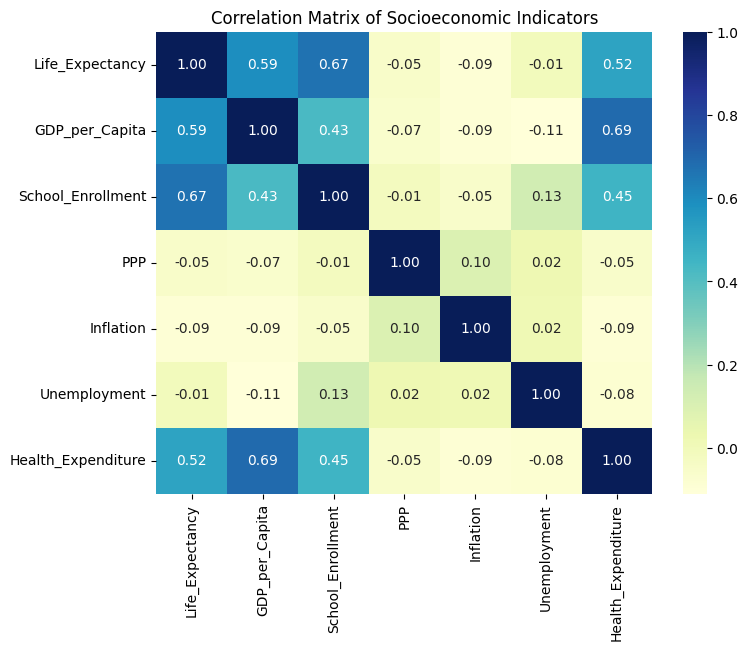

In [10]:
#correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df[['Life_Expectancy','GDP_per_Capita','School_Enrollment','PPP','Inflation','Unemployment','Health_Expenditure']]
            .corr(),
            annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Matrix of Socioeconomic Indicators")
plt.show()


Correlation heatmap

1. School_Enrollment	0.67	Strong positive correlation — countries with higher
school enrollment tend to have higher life expectancy. Education likely improves health awareness and access to better jobs.
2. GDP_per_Capita	0.59	Positive correlation — wealthier nations generally enjoy longer life expectancy due to better living standards, nutrition, and healthcare.
3. Health_Expenditure	0.52	Moderate positive correlation — higher per-capita health spending is associated with better health outcomes and longevity.

Weak or Negligible Relationships

1. Unemployment	–0.01	Very weak (almost none). Global unemployment rates show little direct correlation with life expectancy — possibly due to variations in social welfare systems.
2. Inflation	–0.09	Weak negative — moderate inflation differences don’t seem to affect health outcomes much.
3. PPP (Purchasing Power Parity)	–0.05	Almost no correlation — PPP alone doesn’t capture differences in income distribution or healthcare quality.

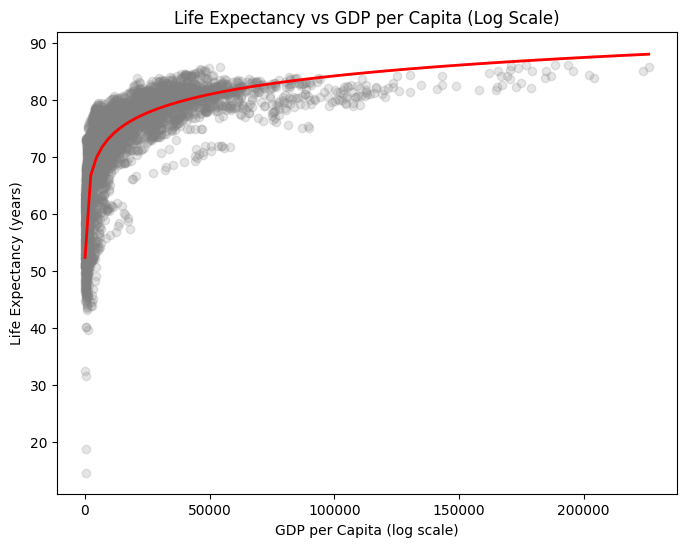

In [11]:
#
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='GDP_per_Capita',
    y='Life_Expectancy',
    scatter_kws={'alpha':0.2, 'color':'gray'},
    line_kws={'color':'red', 'lw':2},
    logx=True
)
plt.title("Life Expectancy vs GDP per Capita (Log Scale)")
plt.xlabel("GDP per Capita (log scale)")
plt.ylabel("Life Expectancy (years)")
plt.show()


scatter plot with regression trendline (log_scale on x-axis)

The graph shows that as GDP per Capita increases, Life Expectancy also increases. However, the rise is steep for low-income countries and becomes flatter for richer ones — meaning extra income improves health more in poorer nations than in wealthier ones. We used a log scale for GDP because its values vary widely across countries; taking the log makes the trend clearer and easier to compare. This finding matches our earlier correlation results (r = 0.59), confirming that economic growth is closely linked to higher life expectancy.

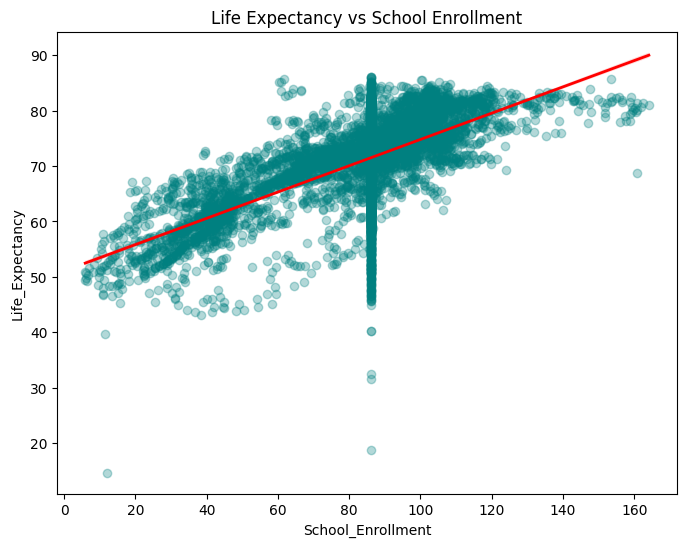

In [12]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='School_Enrollment',
    y='Life_Expectancy',
    scatter_kws={'alpha':0.3, 'color':'teal'},
    line_kws={'color':'red', 'lw':2}
)
plt.title("Life Expectancy vs School Enrollment")
plt.show()


Scatterplot with regression trendline

Each point represents a country–year observation, and the red line shows the average trend between education and life expectancy.

The plot shows that countries with higher school enrollment generally have higher life expectancy. This means education plays an important role in improving health and living conditions. The positive trend supports our earlier correlation result (r = 0.67), confirming that education is one of the strongest predictors of life expectancy in our dataset.

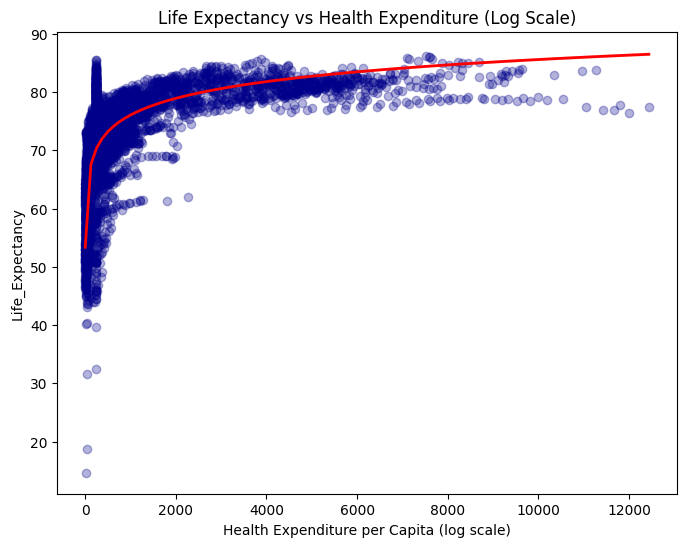

In [13]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='Health_Expenditure',
    y='Life_Expectancy',
    scatter_kws={'alpha':0.3, 'color':'darkblue'},
    line_kws={'color':'red', 'lw':2},
    logx=True
)
plt.title("Life Expectancy vs Health Expenditure (Log Scale)")
plt.xlabel("Health Expenditure per Capita (log scale)")
plt.show()


Scatterplot with regression line (log-scaled x-axis)

Each gray point = a country–year observation
Red line = trendline showing the average pattern

The graph shows that countries spending more on healthcare generally have higher life expectancy. The trend increases quickly at lower spending levels and then levels off for richer nations, showing diminishing returns. A log scale was used to handle the large differences in spending between countries. This finding matches our earlier correlation (r = 0.52), confirming that healthcare investment plays an important role in improving life expectancy.

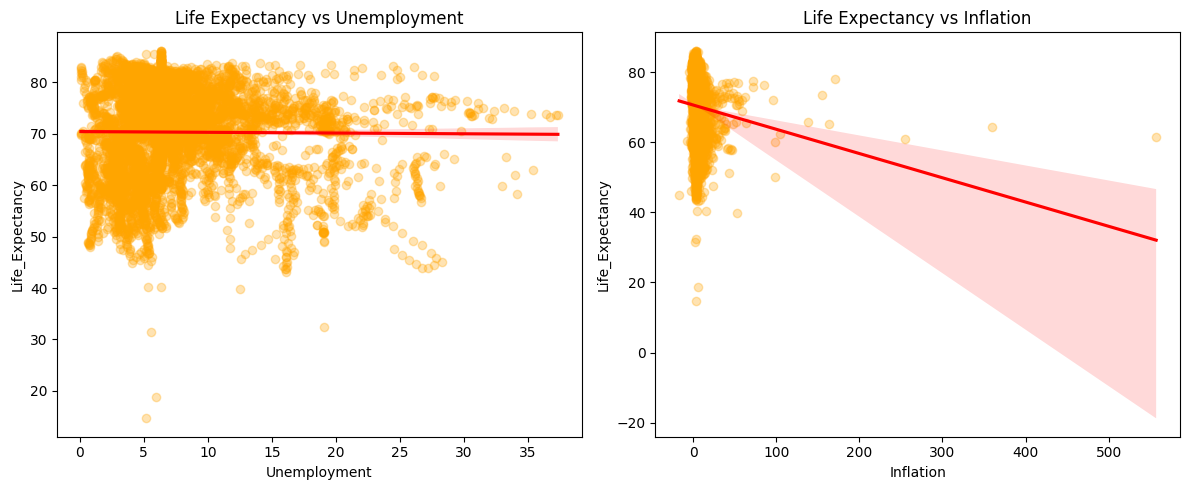

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.regplot(ax=axes[0], data=df, x='Unemployment', y='Life_Expectancy',
            scatter_kws={'alpha':0.3, 'color':'orange'}, line_kws={'color':'red'})
axes[0].set_title("Life Expectancy vs Unemployment")

sns.regplot(ax=axes[1], data=df, x='Inflation', y='Life_Expectancy',
            scatter_kws={'alpha':0.3, 'color':'orange'}, line_kws={'color':'red'})
axes[1].set_title("Life Expectancy vs Inflation")

plt.tight_layout()
plt.show()


Two scatterplots with regression lines (side-by-side layout)

Each dot represents a country in a given year,
and the red line shows the best-fit linear trend.

Left plot: Life Expectancy vs Unemployment

Right plot: Life Expectancy vs Inflation

Both plots show weak or almost no linear relationship between Life Expectancy and the two macroeconomic indicators — Unemployment and Inflation. The trendlines are mostly flat, meaning that variations in these rates don’t directly translate into changes in life expectancy. This supports our correlation findings (r ≈ –0.01 for Unemployment and r ≈ –0.09 for Inflation), confirming that these factors have limited direct impact on health outcomes at a global scale.

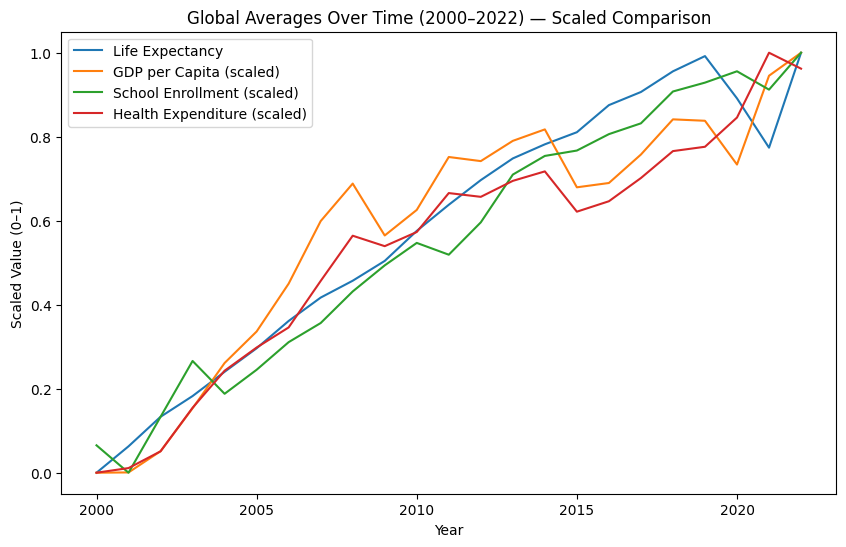

In [15]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate global averages per year
df_year = df.groupby('Year')[['Life_Expectancy', 'GDP_per_Capita', 'School_Enrollment', 'Health_Expenditure']].mean().reset_index()

# Copy for scaling
df_scaled = df_year.copy()

# Columns to scale
cols_to_scale = ['Life_Expectancy', 'GDP_per_Capita', 'School_Enrollment', 'Health_Expenditure']

# Apply MinMax scaling
scaler = MinMaxScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

# Plot scaled trends
plt.figure(figsize=(10,6))
sns.lineplot(data=df_scaled, x='Year', y='Life_Expectancy', label='Life Expectancy')
sns.lineplot(data=df_scaled, x='Year', y='GDP_per_Capita', label='GDP per Capita (scaled)')
sns.lineplot(data=df_scaled, x='Year', y='School_Enrollment', label='School Enrollment (scaled)')
sns.lineplot(data=df_scaled, x='Year', y='Health_Expenditure', label='Health Expenditure (scaled)')

plt.title("Global Averages Over Time (2000–2022) — Scaled Comparison")
plt.ylabel("Scaled Value (0–1)")
plt.legend()
plt.show()

Multi-line time series plot

Each line represents the global average of a socioeconomic or health indicator per year:

Life Expectancy — Blue line

GDP per Capita (scaled) — Green line

School Enrollment (scaled) — Purple line

Health Expenditure (scaled) — Orange line

(Scaling was done using MinMaxScaler so that different indicators with different units can be compared on the same plot.)

The time-trend plot shows that global averages of Life Expectancy, GDP per Capita, School Enrollment, and Health Expenditure have all increased steadily from 2000 to 2022. This suggests that improvements in income, education, and healthcare spending have collectively contributed to better health outcomes worldwide. The use of scaled values allows all variables to be compared on the same plot. The overall pattern supports earlier findings that economic and social development are closely linked to longevity.

In [16]:
#feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_model = df.copy()

#define target and feature columns
target = 'Life_Expectancy'
features = ['GDP_per_Capita', 'School_Enrollment', 'PPP',
            'Inflation', 'Unemployment', 'Health_Expenditure']

#log transform skewed variables
skewed_features = ['GDP_per_Capita', 'PPP', 'Health_Expenditure']
for col in skewed_features:
    df_model[f'log_{col}'] = np.log1p(df_model[col])

#create the final feature set
X = df_model[['log_GDP_per_Capita', 'School_Enrollment', 'log_PPP',
              'Inflation', 'Unemployment', 'log_Health_Expenditure']]
y = df_model[target]

#scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} rows")
print(f"Test set: {X_test.shape[0]} rows")
print(f"Features used: {list(X.columns)}")


Training set: 4747 rows
Test set: 1187 rows
Features used: ['log_GDP_per_Capita', 'School_Enrollment', 'log_PPP', 'Inflation', 'Unemployment', 'log_Health_Expenditure']


In the feature engineering stage, we prepared the dataset for modeling by transforming and standardizing the variables. First, we selected six key socioeconomic features — GDP per Capita, School Enrollment, Purchasing Power Parity (PPP), Inflation, Unemployment, and Health Expenditure — to predict Life Expectancy. Since some variables like GDP, PPP, and Health Expenditure had large and uneven value ranges, we applied a logarithmic transformation to make their distribution more balanced and reduce skewness. We then used standard scaling to bring all features to a similar scale, which helps many machine learning models perform better. Finally, we split the data into training (80%) and testing (20%) sets for fair model evaluation. These steps ensured that our data was clean, consistent, and ready for accurate model comparison.

In [17]:
#model building

# --- STEP 1: Import Libraries ---
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# --- STEP 2: Initialize Models ---
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=200, random_state=42)
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42)

# --- STEP 3: Train Models ---
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# --- STEP 4: Predict on Test Set ---
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# --- STEP 5: Evaluate Models ---
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return pd.Series({'Model': model_name, 'R²': r2, 'MAE': mae, 'RMSE': rmse})

results = pd.DataFrame([
    evaluate_model(y_test, y_pred_lr, 'Linear Regression'),
    evaluate_model(y_test, y_pred_rf, 'Random Forest'),
    evaluate_model(y_test, y_pred_xgb, 'XGBoost')
])

# --- STEP 6: Display Results ---
results.sort_values('R²', ascending=False).reset_index(drop=True)


,Model,R²,MAE,RMSE
0,Random Forest,0.923859,1.473248,2.340123
1,XGBoost,0.919677,1.644009,2.403527
2,Linear Regression,0.724431,3.365893,4.451893


Three models were trained to predict Life Expectancy: Linear Regression, Random Forest, and XGBoost. Among them, Random Forest achieved the highest accuracy with an R² of 0.92 and the lowest error values (MAE = 1.47, RMSE = 2.34). XGBoost performed similarly well, while Linear Regression lagged behind with an R² of 0.72. These results suggest that nonlinear models like Random Forest and XGBoost are better suited for capturing the complex interactions between socioeconomic factors such as GDP, education, and health expenditure that influence life expectancy.

/tmp/ipython-input-776181656.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances, y=rf_importances.index, palette="crest")


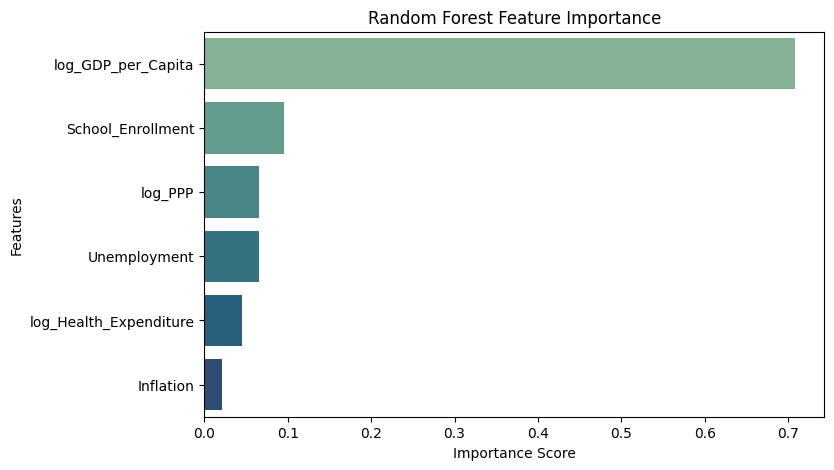

/tmp/ipython-input-776181656.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importances, y=xgb_importances.index, palette="flare")


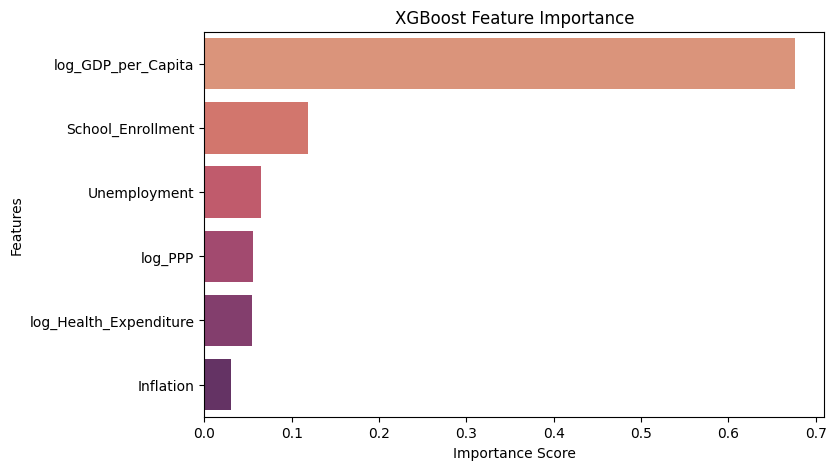

In [18]:
#feature importance

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Random Forest Feature Importance ---
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=rf_importances, y=rf_importances.index, palette="crest")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# --- XGBoost Feature Importance ---
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=xgb_importances, y=xgb_importances.index, palette="flare")
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


GDP per Capita was the strongest predictor of Life Expectancy in both models. Unemployment appeared slightly more important than Health Expenditure, which may seem unexpected. This happened because GDP and Health Expenditure are closely related — the model captures most of the health spending effect through GDP. Meanwhile, Unemployment provides small but unique information, which makes its importance look higher. In reality, the results still support the idea that economic conditions, education, and healthcare are the main drivers of life expectancy.